#Model Machine Learning Memprediksi Keputusan Customer untuk Order

Tanggal Pembuatan Awal : 7 November 2024

Tanggal Perbaikan : 22 November 2024

Dibuat Oleh
Kelompok 2 :    
- Abdurrahman Al Ghifari (2300456)
- Ahmad Izzuddin Azzam (2300492)
- Julian Dwi Satrio (2300484)
- Meisya Amalia (2309357)
- Nuansa Bening Aura Jelita (2301410)

##Pendahuluan

**Latar Belakang:**

Dalam era digital, e-commerce menjadi salah satu sektor yang berkembang pesat seiring meningkatnya penggunaan aplikasi belanja online. Data yang dihasilkan dari aktivitas pelanggan dalam aplikasi tersebut memberikan peluang untuk menganalisis dan memahami pola perilaku mereka. Salah satu tantangan utama bagi perusahaan e-commerce adalah memprediksi keputusan pelanggan untuk melakukan pemesanan, yang sangat berguna dalam merancang strategi pemasaran dan meningkatkan pengalaman pelanggan.

Penelitian ini memanfaatkan dataset DMC2013 yang mencatat aktivitas pelanggan pada sebuah aplikasi belanja online. Dataset ini mencakup berbagai informasi yang dapat digunakan untuk memprediksi hasil akhir keputusan pelanggan, yaitu apakah mereka akan melakukan order atau tidak, berdasarkan aktivitas mereka selama mengakses aplikasi tersebut.

**Tujuan dari penelitian ini adalah:**

1. Mengembangkan model machine learning untuk memprediksi keputusan pelanggan dalam melakukan order.
2. Memproses data pelatihan (training data) untuk mendukung desain model yang optimal.
3. Merancang model prediksi yang mampu menghasilkan keluaran sesuai format yang ditentukan, yaitu per sesi (persession|prediksi).

Proses pengembangan model mencakup empat tahapan utama, yaitu pengolahan dataset dengan EDA untuk menghasilkan data yang bersih, desain model machine learning menggunakan algoritma yang sesuai, melatih model dengan data latih dan melakukan validasi serta testing pada model. Dengan adanya model ini, diharapkan perusahaan dapat meningkatkan akurasi prediksi, memahami perilaku pelanggan dengan lebih baik, serta mendukung pengambilan keputusan strategis yang berbasis data.

## Import Libraries dan Load Data

**Import Library yang akan digunakan**

In [125]:
import pandas as pd
import xgboost as xgb
import seaborn as sns  # Impor seaborn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


**Penjelasan Setiap Library**

**1. pandas:** Library untuk manipulasi data dalam bentuk tabel (DataFrame) seperti mengimpor, membersihkan, mengelola, dan memproses data dengan mudah.

**2. xgboost:** Library untuk membangun model machine learning berbasis Gradient Boosting, sangat baik untuk tugas prediksi dan klasifikasi, dengan performa tinggi pada data kompleks.

**3. train_test_split:** Fungsi dari scikit-learn untuk membagi dataset menjadi data latih dan uji, sehingga memudahkan proses pelatihan dan evaluasi model.

**4. accuracy_score, classification_report, confusion_matrix:** Fungsi dari scikit-learn untuk mengevaluasi performa model:
- **accuracy_score:** Mengukur akurasi prediksi model.
- **classification_report:** Menampilkan metrik seperti precision, recall, dan F1-score untuk setiap kelas.
- **confusion_matrix:** Membuat matriks kebingungan (confusion matrix) yang menunjukkan prediksi benar dan salah.

**5. ConfusionMatrixDisplay:** Alat untuk menampilkan matriks kebingungan dalam bentuk grafik agar hasil klasifikasi lebih mudah dipahami.

**6. matplotlib.pyplot:** Library untuk membuat grafik dan visualisasi data, seperti menampilkan confusion matrix dan grafik lainnya.

**7. numpy:** Library untuk manipulasi array besar dan operasi matematika, sangat berguna dalam komputasi numerik yang cepat dan efisien.

**Read data dari drive alokasi dataset dengan konfigurasi read yang disesuaikan**

In [126]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1GpevVev1-S1hcskOuFbI_2K6xgnk01kW", delimiter='|', encoding='ascii', na_values='?')
df.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,NaN,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1.0,600.0,70.0,21.0,1.0,43.0,1.0,49.0,y
3,2,6,5,0.000,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y
4,2,6,5,15.633,0,NaN,NaN,NaN,0,NaN,...,completely orderable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y


**Melihat informasi field pada data**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        426248 non-null  float64
 6   cMaxPrice        426248 non-null  float64
 7   cSumPrice        426248 non-null  float64
 8   bCount           429013 non-null  int64  
 9   bMinPrice        423883 non-null  float64
 10  bMaxPrice        423883 non-null  float64
 11  bSumPrice        423883 non-null  float64
 12  bStep            237680 non-null  float64
 13  onlineStatus     268634 non-null  object 
 14  availability     263758 non-null  object 
 15  customerNo       277915 non-null  float64
 16  maxVal           275273 non-null  floa

**Penjelasan Setiap Kolom:**

1. **sessionNo**: Nomor unik yang menunjukkan sesi individu pengguna.

2. **startHour**: Jam sesi dimulai (0–23), berguna untuk melihat pola aktivitas harian.

3. **startWeekday**: Hari sesi dimulai (1=Senin hingga 7=Minggu), untuk analisis mingguan.

4. **duration**: Durasi sesi dalam detik, mencerminkan lamanya pengguna aktif dalam satu sesi.

5. **cCount**: Jumlah produk yang diklik dalam sesi, menunjukkan minat pengguna.

6. **cMinPrice**: Harga terendah dari produk yang diklik, memberi gambaran harga minimum yang dilihat pengguna.

7. **cMaxPrice**: Harga tertinggi dari produk yang diklik, menunjukkan tingkat maksimum harga yang dilihat.

8. **cSumPrice**: Total harga produk yang diklik, merefleksikan potensi pengeluaran.

9. **bCount**: Jumlah produk yang ditambahkan ke keranjang, indikator minat beli.

10. **bMinPrice**: Harga terendah produk di keranjang, menggambarkan rentang harga keranjang.

11. **bMaxPrice**: Harga tertinggi produk di keranjang, menunjukkan preferensi harga tertinggi.

12. **bSumPrice**: Total harga semua produk di keranjang, potensi total nilai belanja.

13. **bStep**: Langkah terakhir proses pembelian yang dicapai pengguna.

14. **onlineStatus**: Status apakah pengguna online (y/n) saat sesi berlangsung.

15. **availability**: Status ketersediaan produk yang dilihat oleh pengguna.

16. **customerID**: ID unik pelanggan, membantu identifikasi pelanggan.

17. **maxVal**: Harga pembelian maksimal yang diperbolehkan untuk pelanggan.

18. **customerScore**: Skor pelanggan dari perspektif toko, menilai nilai pelanggan.

19. **accountLifetime**: Lama akun pelanggan dalam bulan.

20. **payments**: Total pembayaran yang dilakukan pelanggan, mencerminkan riwayat belanja.

21. **age**: Usia pelanggan, berpengaruh pada preferensi produk.

22. **address**: Bentuk alamat pelanggan (1=Mr, 2=Mrs, 3=Company).

23. **lastOrder**: Jumlah hari sejak pesanan terakhir, menunjukkan frekuensi belanja.

24. **order**: Hasil dari sesi (y = ada pembelian, n = tidak ada pembelian).



**Cek apakah ada data yang duplikat**

In [128]:
df.duplicated().sum()

0

**Cek apakah ada data null**

In [129]:
df.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,2765
cMaxPrice,2765
cSumPrice,2765
bCount,0
bMinPrice,5130


**Cek tipe data yang digunakan dalam setiap kolom pada dataset**

In [130]:
df.dtypes

,0
sessionNo,int64
startHour,int64
startWeekday,int64
duration,float64
cCount,int64
cMinPrice,float64
cMaxPrice,float64
cSumPrice,float64
bCount,int64
bMinPrice,float64


**Lakukan describe untuk melihat hasil perhitungan distribusi dari setiap atribut data**

In [131]:
df.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,bSumPrice,bStep,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,426248.000000,426248.000000,426248.000000,429013.000000,423883.000000,...,423883.000000,237680.000000,277915.000000,275273.000000,275273.000000,275273.000000,277915.000000,277617.000000,277915.000000,277915.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,55.289127,146.663005,1189.248209,4.135168,67.625341,...,213.260809,2.292393,12184.130921,2486.358270,485.298449,135.557403,15.218016,44.919861,1.734556,79.883975
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,148.879937,283.217841,3371.173815,4.451778,174.986371,...,459.389852,1.306963,7297.774184,3038.425813,131.027630,109.577139,34.892917,11.935945,0.443903,113.201967
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,1.000000,3.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,6.990000,25.950000,137.960000,1.000000,8.990000,...,39.990000,1.000000,5793.000000,600.000000,481.000000,43.000000,3.000000,36.000000,1.000000,14.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,12.000000,49.990000,388.000000,3.000000,14.990000,...,87.970000,2.000000,12045.000000,1500.000000,520.000000,109.000000,8.000000,45.000000,2.000000,34.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,29.990000,99.990000,1046.430000,5.000000,34.990000,...,205.380000,3.000000,18350.000000,4000.000000,555.000000,219.000000,15.000000,53.000000,2.000000,86.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,5999.990000,6999.990000,115742.000000,108.000000,6999.990000,...,23116.880000,5.000000,25038.000000,50000.000000,638.000000,600.000000,868.000000,99.000000,3.000000,738.000000


## Exploration Data Analysis

**Mengeksplorasi field data jam penggunaan aplikasi**




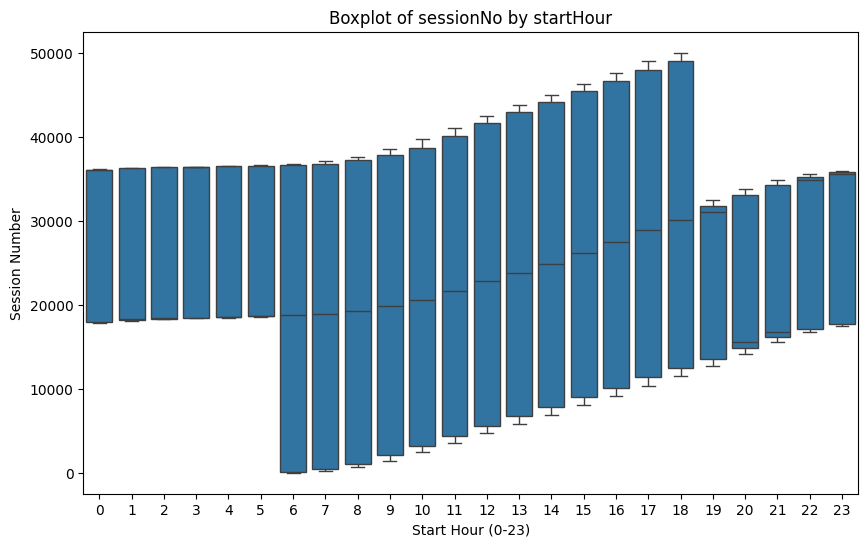

In [132]:
# Membuat boxplot untuk startHour
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='startHour', y='sessionNo')
plt.title('Boxplot of sessionNo by startHour')
plt.xlabel('Start Hour (0-23)')
plt.ylabel('Session Number')
plt.xticks(range(24))  # Agar x-axis menampilkan angka 0-23
plt.show()

## startWeekday
# Pastikan kolom startWeekday berisi nilai 1 hingga 7
df['startWeekday'] = df['startWeekday'].astype('category')
df['startWeekday'] = df['startWeekday'].cat.set_categories([1, 2, 3, 4, 5, 6, 7], ordered=True)


**Analisis Plot:**

**Start Hour :** Angka pada kolom startHour yang berkisar antara 0 hingga 23 merepresentasikan jam mulai dari 00:00 hingga 23:00 (pagi hingga malam).

**Session Number :** Sedangkan, kolom sessionNo menunjukkan jumlah sesi yang terjadi pada setiap jam tersebut. Dengan kata lain, data ini menggambarkan distribusi sesi berdasarkan waktu, di mana kita dapat melihat bagaimana banyaknya sesi yang dimulai pada jam tertentu sepanjang hari.

Terlihat Session Number disini menunjukan bahwa pada jam 6:00 pagi mempunyai jumlah session terdikit, dan di jam 18:00 mempunyai jumlah session terbanyak pada data yang kita punya.

Dengan jumlah sesi terbanyak pada jam 18:00, dapat diasumsikan bahwa pelanggan lebih aktif berbelanja pada sore atau malam hari, kemungkinan karena mereka memiliki waktu luang setelah aktivitas harian. Sebaliknya, pada jam 6:00 pagi, jumlah sesi yang dimulai sangat sedikit. Hal ini menunjukkan bahwa pelanggan cenderung tidak berbelanja di pagi hari, yang dapat menjadi peluang untuk meningkatkan aktivitas pelanggan di jam tersebut melalui strategi pemasaran tertentu.

**Mengeksplorasi field data hari penggunaan aplikasi**

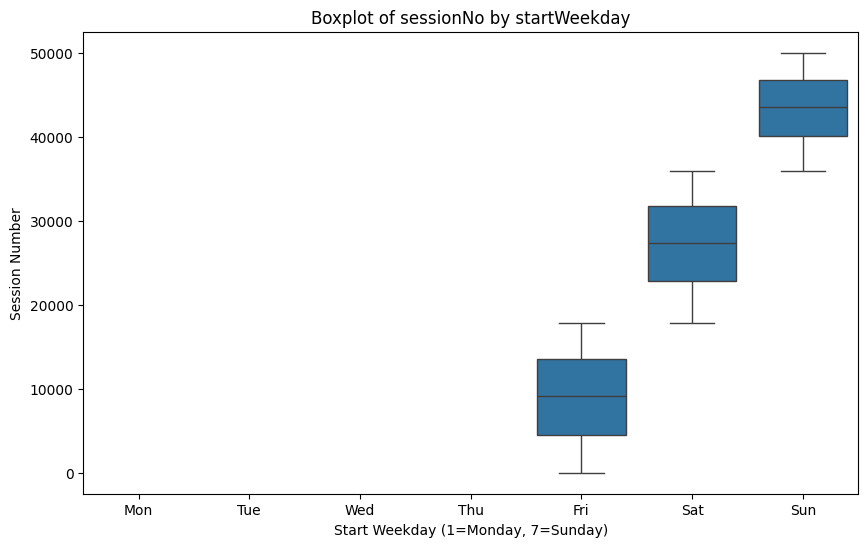

In [133]:
# Membuat boxplot untuk startWeekday
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='startWeekday', y='sessionNo')
plt.title('Boxplot of sessionNo by startWeekday')
plt.xlabel('Start Weekday (1=Monday, 7=Sunday)')
plt.ylabel('Session Number')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Menambahkan label hari
plt.show()

**Analisis Plot:**  

Diagram boxplot di atas menunjukkan jumlah sesi yang terjadi setiap hari dalam seminggu. Berdasarkan data, kolom *start weekday* berisi angka 1 hingga 7 yang merepresentasikan hari-hari dalam satu minggu:  

- **1** merepresentasikan Senin  
- **2** merepresentasikan Selasa  
- **3** merepresentasikan Rabu  
- **4** merepresentasikan Kamis  
- **5** merepresentasikan Jumat  
- **6** merepresentasikan Sabtu  
- **7** merepresentasikan Ahad  

Pada diagram tersebut, sumbu x menampilkan *start weekday* dari angka 1 hingga 7 yang kemudian direpresentasikan menjadi hari-hari dalam satu pekan. Sementara itu, sumbu y menunjukkan jumlah sesi pengguna yang membuka aplikasi pada hari-hari tertentu, sesuai data yang ditampilkan di diagram.  

Dari diagram dapat dianalisis bahwa data yang tersedia hanya mencakup *start weekday* dengan nilai 5 hingga 7, yang berarti aktivitas aplikasi hanya tercatat pada hari Jumat, Sabtu, dan Ahad.  

- **Ahad (7):** Jumlah pengguna aplikasi mencapai puncaknya pada hari Ahad, menjadikannya hari dengan penggunaan tertinggi. Hal ini kemungkinan besar terjadi karena banyak orang memanfaatkan hari Ahad untuk berlibur atau beristirahat di rumah setelah menjalani rutinitas sehari-hari.  

- **Sabtu (6):** Penggunaan aplikasi pada hari Sabtu berada di tengah-tengah antara Jumat dan Ahad. Hal ini disebabkan oleh variasi aktivitas di hari Sabtu, di mana sebagian orang sudah mulai libur, sementara sebagian lainnya masih bekerja atau memiliki kegiatan lain yang harus dilakukan.  

- **Jumat (5):** Aktivitas pengguna aplikasi pada hari Jumat relatif lebih rendah dibandingkan dengan Sabtu dan Ahad. Sebagai hari aktif kerja, banyak orang lebih fokus pada aktivitas atau rutinitas harian mereka. Akibatnya, penggunaan aplikasi biasanya dilakukan hanya sebentar, terutama jika mereka sedang sibuk dengan pekerjaan atau kegiatan lain.  

**Mengeksplorasi field data durasi per jamnya penggunaan aplikasi**

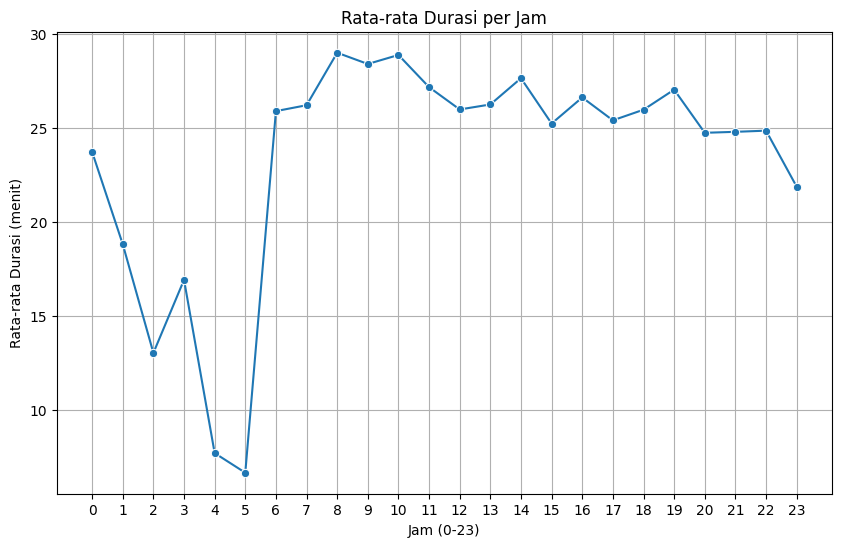

In [134]:
# Mengelompokkan data berdasarkan startHour dan menghitung rata-rata durasi
average_duration_per_hour = df.groupby('startHour')['duration'].mean().reset_index()

# Konversi durasi ke menit
average_duration_per_hour['duration'] = average_duration_per_hour['duration'] / 60  # Konversi durasi ke menit

# Membuat lineplot untuk rata-rata durasi per jam
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_duration_per_hour, x='startHour', y='duration', marker='o')
plt.title('Rata-rata Durasi per Jam')
plt.xlabel('Jam (0-23)')
plt.ylabel('Rata-rata Durasi (menit)')
plt.xticks(range(24))  # Menampilkan jam 0-23 pada sumbu x
plt.grid(True)
plt.show()

**Analisis Plot:**  

Pada diagram ini, sumbu x merepresentasikan jam dalam satu hari, sementara sumbu y menunjukkan rata-rata durasi penggunaan aplikasi oleh seluruh pengguna online shop pada jam-jam tertentu. Berikut adalah analisis berdasarkan pembagian waktu:  

**Jam 0 - 2:**  
Pada jam-jam ini, rata-rata durasi penggunaan aplikasi terlihat menurun secara signifikan, terutama setelah tengah malam hingga pukul 2 pagi. Penurunan ini dapat dikaitkan dengan waktu tidur mayoritas pengguna, sehingga durasi penggunaan aplikasi menjadi sangat singkat, seperti yang terlihat pada jam 1 pagi hingga menjelang subuh.  

**Jam 5 - 6:**  
Rata-rata durasi penggunaan aplikasi mulai meningkat tajam pada pukul 5 hingga 6 pagi. Hal ini dapat terjadi karena banyak orang mulai bangun tidur, bersiap-siap menjalani aktivitas sehari-hari, atau menghabiskan waktu santai sebelum memulai pekerjaan. Pada waktu ini, aktivitas seperti membuka online shop menjadi lebih umum.  

**Jam 6 - 19:**  
Antara pukul 6 pagi hingga 7 malam, rata-rata durasi penggunaan aplikasi berada pada tingkat yang lebih tinggi. Hal ini kemungkinan disebabkan oleh waktu luang yang lebih banyak tersedia pada rentang waktu tersebut, memungkinkan pengguna untuk lebih sering dan lebih lama membuka online shop.  

**Jam 19 - 24:**  
Pada rentang waktu ini, penggunaan aplikasi mulai menurun, terutama karena kebanyakan orang bersiap untuk beristirahat atau tidur. Berdasarkan data, mayoritas pengguna dalam rentang waktu ini berasal dari kelompok usia 35 tahun ke atas, yang mungkin memiliki pola tidur lebih teratur dan cenderung mengurangi aktivitas online pada malam hari.  

**Mengeksplorasi Jumlah Sesi Berdasarkan StartHour dan Status Order (y/n)**

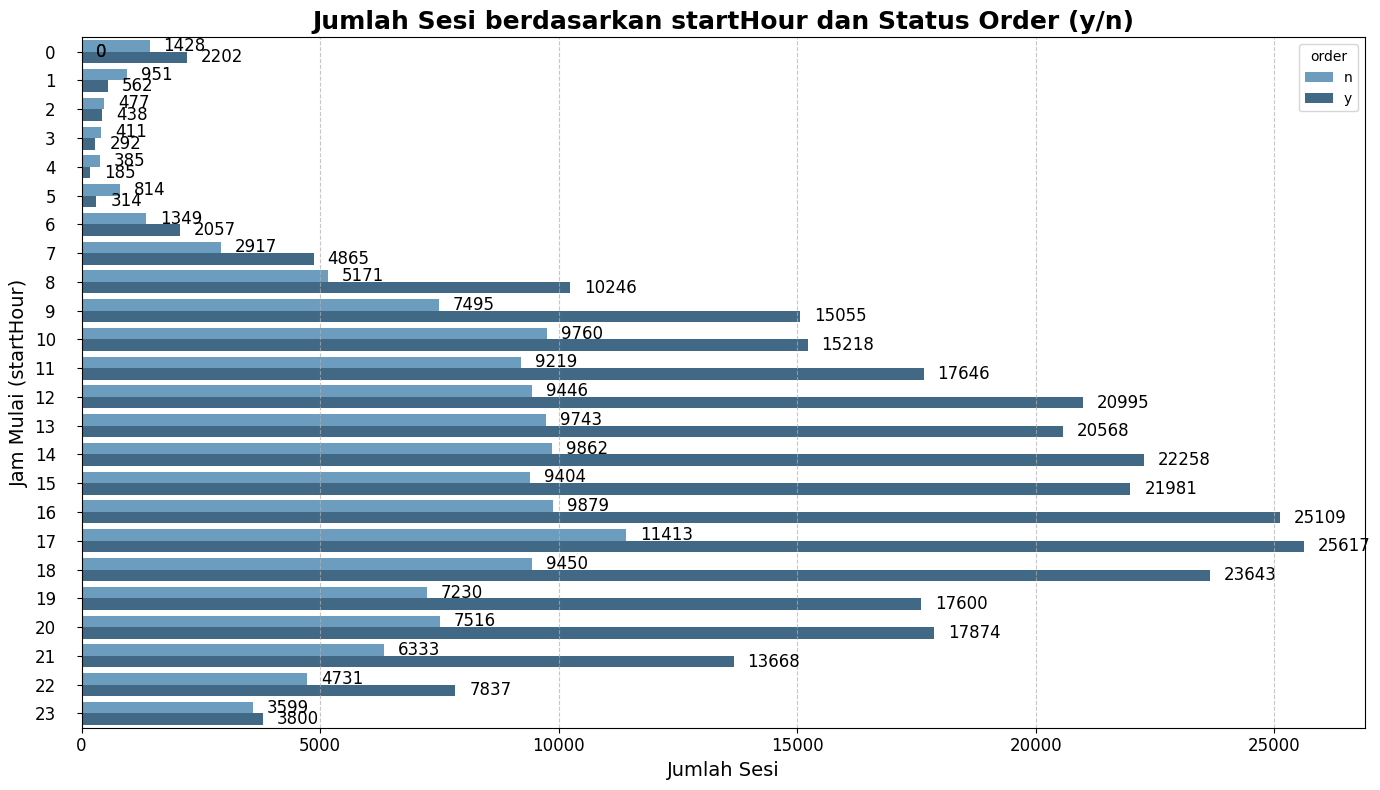

In [135]:
# Membuat bar plot horizontal untuk melihat jumlah sesi berdasarkan startHour dan status order (y atau n)
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y='startHour', hue='order', palette='Blues_d', dodge=True)

plt.title('Jumlah Sesi berdasarkan startHour dan Status Order (y/n)', fontsize=18, fontweight='bold')
plt.ylabel('Jam Mulai (startHour)', fontsize=14)
plt.xlabel('Jumlah Sesi', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(rotation=0)
plt.tick_params(axis='y', which='major', pad=15)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Menambahkan label numerik pada setiap bar untuk lebih jelas
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}',
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center',
                       fontsize=12, color='black',
                       xytext=(10, 0), textcoords='offset points')
plt.tight_layout()
plt.show()


Plot diagram di atas adalah bar plot yang menunjukkan jumlah sesi pengguna berdasarkan jam mulai sesi (startHour) dan status order (y atau n).

- Sumbu y menampilkan jam mulai sesi (startHour) dalam rentang 0 hingga 23, yang merepresentasikan waktu dalam satu hari.
- Sumbu x menunjukkan jumlah total sesi yang terjadi pada setiap jam, dengan nilai yang berbeda berdasarkan status order.
- Warna batang menunjukkan status order, yaitu batang gelap menunjukkan sesi dengan status 'y' (terjadi order) dan batang terang menunjukkan sesi dengan status 'n' (tidak terjadi order).

**Analisis Plot :**

Pada waktu dengan sedikit sesi, seperti dini hari antara jam 0 hingga 5, sesi tanpa order (n) secara proporsional mendominasi aktivitas pengguna. Sebaliknya, pada jam-jam aktif mulai dari jam 8 hingga 20 dengan puncak di jam 17, sesi dengan status (y) menunjukkan peningkatan yang signifikan.

Aktivitas yang sangat rendah pada dini hari kemungkinan besar terjadi karena ini adalah waktu istirahat bagi sebagian besar pengguna. Pengguna yang aktif pada jam ini cenderung hanya menjelajah tanpa melakukan pembelian karena waktu tersebut biasanya digunakan untuk mencari referensi atau sekadar melihat-lihat.

Pada jam-jam sibuk, yakni mulai jam 8 hingga sore hari, konversi lebih tinggi karena pengguna mungkin sudah memiliki niat untuk membeli barang. Jam ini sering dimanfaatkan oleh pelaku bisnis untuk menjalankan promosi atau mengirimkan notifikasi, seperti pengingat keranjang belanja, sehingga memperbesar peluang terjadinya order.





**Mengeksplorasi data field Distribusi Umur Pelanggan**

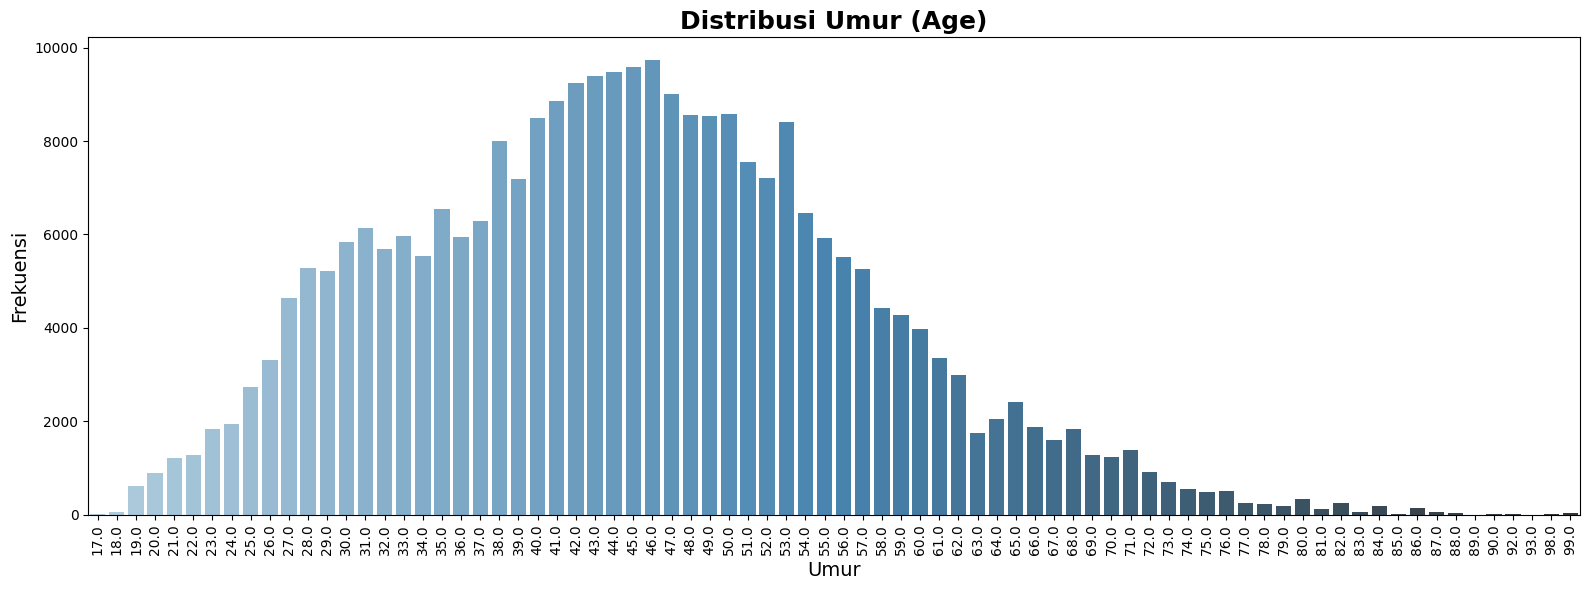

In [136]:
# Hitung frekuensi untuk setiap nilai unik di kolom age
age_distribution = df['age'].value_counts().sort_index()

# Plot distribusi umur
plt.figure(figsize=(16, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='Blues_d')
plt.title('Distribusi Umur (Age)', fontsize=18, fontweight='bold')
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Plot di atas menunjukkan distribusi umur (age) pelanggan dari sebuah online shop.
- Sumbu x merepresentasikan rentang umur pelanggan, mulai dari 17 hingga 99 tahun.
- Sumbu y menunjukkan frekuensi pelanggan di setiap rentang umur.

**Analisis Plot :**

Kelompok pelanggan terbanyak berasal dari akhir usia 20 hingga awal 50 tahun, dengan puncak aktivitas pada usia sekitar 40 tahun. Ini menunjukkan bahwa sebagian besar pelanggan online shop berasal dari kelompok usia dewasa produktif, yang biasanya memiliki daya beli lebih tinggi dan kenyamanan dalam menggunakan teknologi.

Pelanggan dari kelompok usia di bawah 20 tahun memiliki frekuensi yang jauh lebih sedikit, kemungkinan karena keterbatasan daya beli atau preferensi untuk berbelanja offline. Sementara itu, kelompok usia di atas 60 tahun juga menunjukkan penurunan signifikan, mungkin karena adaptasi teknologi yang lebih rendah di kalangan pelanggan yang lebih tua.

**Mengeksplorasi field data Distribusi Umur Pelanggan dengan Umur yang Tidak Diketahui**

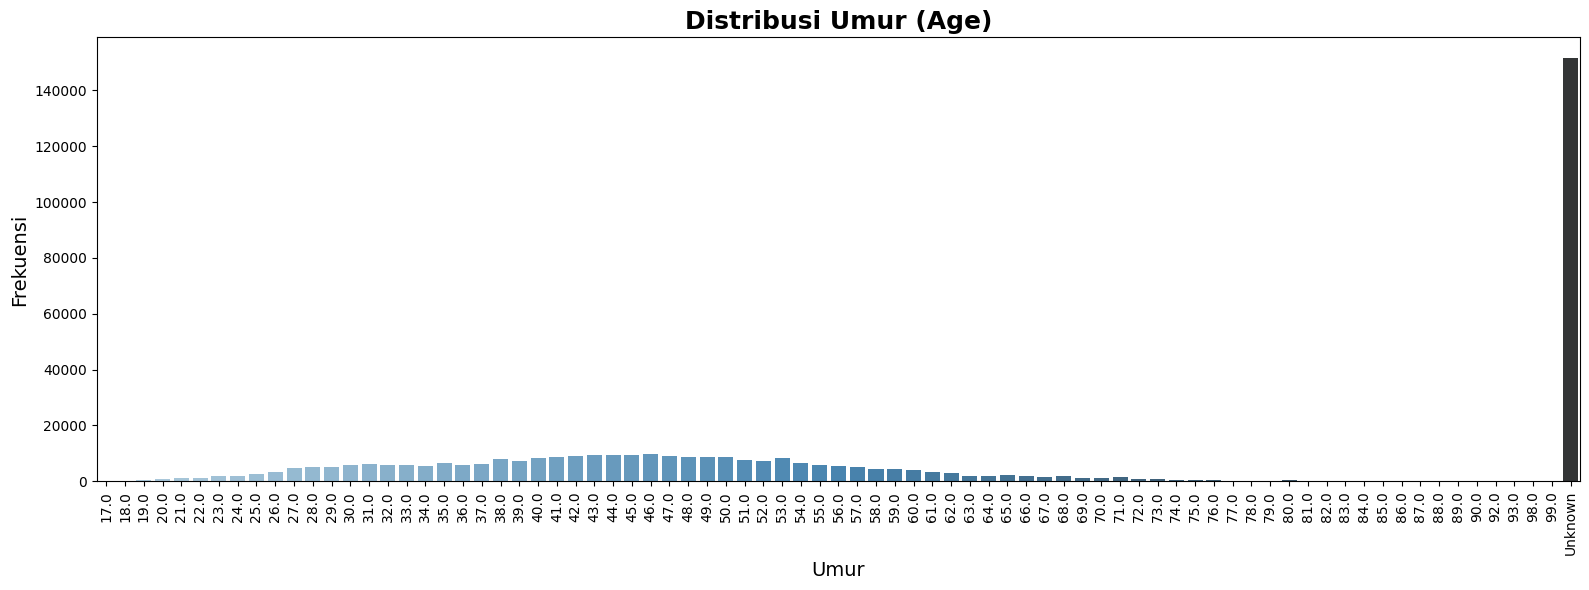

In [137]:
# Ganti NaN atau ? dengan label 'Unknown'
df['age'] = df['age'].fillna('Unknown')

# Hitung frekuensi untuk setiap nilai unik di kolom age
age_distribution = df['age'].value_counts()

# Ubah tipe data index age_distribution menjadi string sebelum diurutkan
age_distribution.index = age_distribution.index.astype(str)

# Sekarang Anda dapat mengurutkan index:
age_distribution = age_distribution.sort_index()

# Plot distribusi umur (termasuk 'Unknown')
plt.figure(figsize=(16, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='Blues_d')
plt.title('Distribusi Umur (Age)', fontsize=18, fontweight='bold')
plt.xlabel('Umur', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

Plot di atas menunjukkan distribusi umur (age) pelanggan dari sebuah online shop.
- Sumbu x merepresentasikan rentang umur pelanggan, mulai dari 17 hingga 99 tahun dan bar unknown(umur pelanggan yang tidak diketahui).
- Sumbu y menunjukkan frekuensi pelanggan di setiap rentang umur.

**Analisis Plot :**

Bar 'Unknown' pada grafik distribusi umur di atas menunjukkan jumlah pengguna dengan data umur yang tidak tercatat atau tidak tersedia. Berdasarkan visualisasi, frekuensi pengguna dengan umur yang tidak diketahui sangat signifikan, bahkan jauh melebihi jumlah pengguna di setiap kategori umur lainnya.

Hal tersebut mungkin saja terjadi karena banyak platform online tidak mewajibkan pengguna untuk mengisi informasi umur. Jika umur tidak menjadi kolom wajib saat registrasi, kemungkinan besar banyak pengguna memilih untuk melewatkan pengisian informasi tersebut.

Lalu untuk masalah privasi beberapa pengguna mungkin secara sengaja tidak ingin membagikan informasi pribadi seperti umur karena alasan privasi, terutama jika platform tidak memberikan kejelasan tentang bagaimana data tersebut digunakan.

Dalam beberapa kasus, kegagalan sistem, seperti error dalam proses pencatatan atau penyimpanan data, bisa menyebabkan umur pelanggan tercatat sebagai 'Unknown'. Selain itu, data historis dari pelanggan lama mungkin tidak mencakup informasi ini.





**Eksplorasi field data sesion yang sampai bStep 5 dan order atau tidaknya**

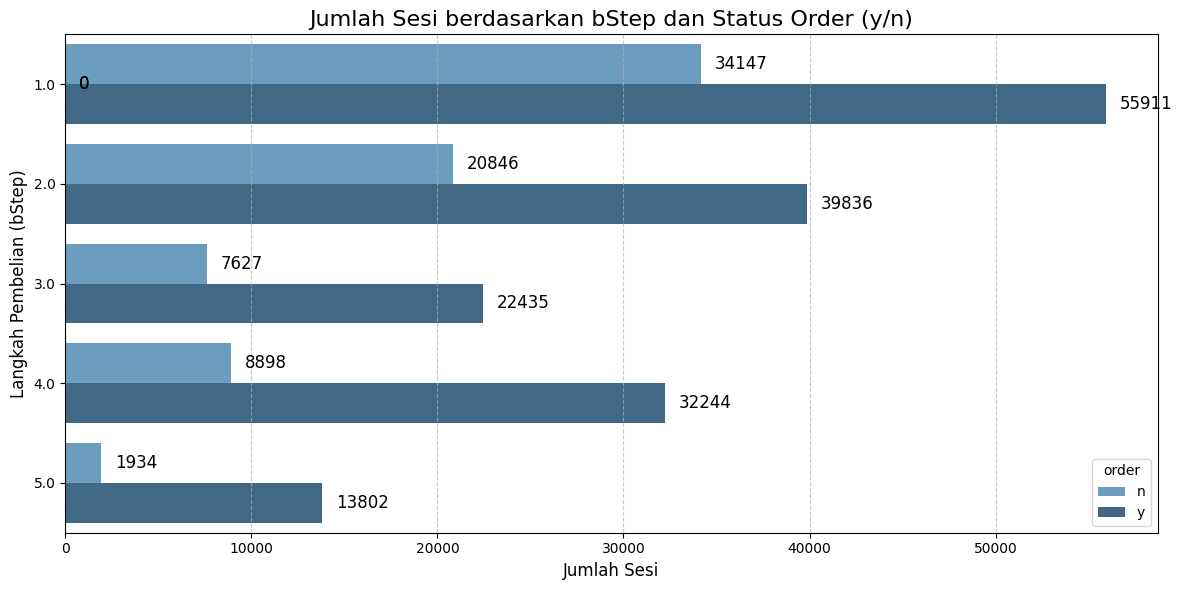

In [138]:
# Filter data untuk bStep <= 5
df_filtered = df[df['bStep'] <= 5]

# Membuat bar plot horizontal untuk melihat jumlah sesi berdasarkan bStep dan status order (y atau n)
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, y='bStep', hue='order', palette='Blues_d')  # Menambahkan hue untuk status order
plt.title('Jumlah Sesi berdasarkan bStep dan Status Order (y/n)', fontsize=16)
plt.ylabel('Langkah Pembelian (bStep)', fontsize=12)
plt.xlabel('Jumlah Sesi', fontsize=12)

# Menambahkan grid dan merapikan tampilan sumbu
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.yticks(rotation=0)  # Menjaga label sumbu y tetap horizontal

# Menambahkan label numerik pada setiap bar untuk lebih jelas
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center', fontsize=12, color='black', xytext=(10, 0),
                       textcoords='offset points')

# Tampilkan plot
plt.tight_layout()  # Agar semua label dan elemen tampil dengan baik
plt.show()


**Analisis Plot:**

Berdasarkan data yang tersedia, kita dapat melihat distribusi pengguna di berbagai tahap pembelian, mulai dari tahap 1 hingga tahap 5. Semakin mendekati tahap 5, persentase pengguna yang melakukan checkout cenderung meningkat.

Pada tahap 1, persentase pengguna yang melakukan checkout adalah sekitar 50%. Begitu pula pada tahap 2, di mana persentase checkout tetap berada di sekitar 50%. Namun, seiring dengan naiknya tahap ke 3, 4, dan akhirnya 5, persentase checkout semakin besar dibandingkan dengan yang tidak jadi.

Pada tahap 5, kita dapat melihat bahwa pengguna yang berada pada tahap ini memiliki kemungkinan checkout yang jauh lebih tinggi, dengan persentase yang terus meningkat seiring dengan bertambahnya tahap pembelian yang telah dilalui.

**Menangani Nilai Hilang dalam Dataset**

In [139]:
# Imputasi ulang nilai NaN jika ada
df.fillna(df.median(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

Proses imputasi dilakukan untuk menangani nilai hilang (NaN) dalam dataset. Pertama, untuk kolom numerik, nilai NaN diisi dengan nilai median dari kolom tersebut. Penggunaan median dipilih untuk menghindari pengaruh nilai ekstrim (outlier) yang dapat mengganggu distribusi data. Selanjutnya, untuk kolom kategorikal, nilai NaN diimputasi dengan modus, yaitu nilai yang paling sering muncul dalam kolom tersebut. Langkah ini memastikan bahwa tidak ada nilai hilang yang tersisa dalam dataset, memungkinkan analisis lebih lanjut tanpa gangguan data yang hilang

## Membuat model machine learning dari data yang sudah di Clean Up

**Pra-proses Dataset**

In [140]:
# Pra-pemrosesan Data: Mengubah kategori menjadi numerik dan integer
df['onlineStatus'] = df['onlineStatus'].map({'y': 1, 'n': 0})
df['availability'] = df['availability'].map({'y': 1, 'n': 0})
df['address'] = df['address'].map({1: 'Mr', 2: 'Mrs', 3: 'Company'}).map({'Mr': 1, 'Mrs': 2, 'Company': 3})
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['startWeekday'] = df['startWeekday'].astype(int)

XGBoost merupakan algoritma berbasis pohon keputusan yang bekerja dengan mempartisi data berdasarkan nilai numerik. XGBoost tidak memiliki mekanisme bawaan untuk menangani data kategori secara langsung. Oleh karena itu, data kategori perlu dikodekan dalam bentuk numerik agar dapat digunakan dalam model.

**Pemilihan Fitur dan Target**

In [141]:
# Pilih fitur yang relevan berdasarkan 'Importance by Gain'
X = df[['bStep', 'maxVal', 'bCount', 'onlineStatus', 'bMinPrice', 'accountLifetime', 'duration',
        'bMaxPrice', 'startWeekday', 'payments', 'age', 'startHour', 'lastOrder', 'cMaxPrice',
        'bSumPrice', 'cCount', 'cSumPrice', 'cMinPrice', 'customerScore', 'address', 'availability']]
y = df['order'].map({'y': 1, 'n': 0})  # Kolom 'order' sebagai target

**Alasan Pemilihan Fitur untuk Model Machine Learning**

Fitur-fitur yang dipilih didasarkan pada importance by gain, yang menunjukkan kontribusi setiap fitur terhadap akurasi model.

**Fitur-fitur berikut dipilih karena relevansinya dengan prediksi keputusan pelanggan:**

1. bStep: Menunjukkan langkah terakhir yang dicapai dalam proses pembelian. Fitur ini penting karena langkah pembelian adalah indikator langsung dari keputusan pelanggan.
2. maxVal: Batas maksimum harga pembelian yang diperbolehkan. Informasi ini membantu memahami potensi pengeluaran pelanggan.
3. bCount: Jumlah produk yang ditambahkan ke keranjang. Indikator penting minat beli pelanggan.
4. onlineStatus: Status apakah pelanggan sedang online selama sesi. Pelanggan yang online lebih mungkin untuk bertransaksi.
5. bMinPrice, bMaxPrice, bSumPrice: Beragam informasi harga produk di keranjang memberikan gambaran tentang preferensi harga dan potensi nilai belanja.
6. accountLifetime: Lamanya akun pelanggan aktif menunjukkan loyalitas pelanggan dan kemungkinan untuk membeli.
7. duration: Durasi sesi mencerminkan tingkat keterlibatan pelanggan dalam satu sesi.
8. startWeekday: Hari dalam minggu ketika sesi terjadi, membantu mengidentifikasi tren aktivitas berdasarkan hari tertentu.
9. payments: Total pembayaran sebelumnya adalah indikator kuat dari kebiasaan belanja pelanggan.
10. age: Usia pelanggan memengaruhi preferensi belanja dan keputusan membeli.
11. startHour: Jam sesi dimulai, penting untuk analisis perilaku berdasarkan waktu.
12. lastOrder: Jumlah hari sejak pesanan terakhir. Pelanggan yang sering membeli cenderung lebih mungkin untuk melakukan pembelian lagi.
13. cMaxPrice, cMinPrice, cSumPrice, cCount: Informasi terkait produk yang diklik menunjukkan minat awal pelanggan, yang sering kali menjadi prediktor pembelian.
14. customerScore: Nilai pelanggan berdasarkan perspektif toko, yang mencerminkan potensi pelanggan untuk membeli.
15. address: Bentuk alamat memberikan wawasan tentang demografi pelanggan, seperti jenis kelamin atau jenis entitas (company).
16. availability: Status ketersediaan produk dapat memengaruhi keputusan pembelian.
Alasan Tidak Memilih Fitur Lain

**Fitur yang tidak dipilih dianggap memiliki kontribusi yang rendah terhadap model atau redundansi dengan fitur lain:**

1. sessionNo: Nomor sesi bersifat unik dan tidak membawa informasi prediktif.
2. customerID: Identifikasi pelanggan tidak relevan untuk prediksi langsung dan lebih cocok untuk segmentasi pelanggan.

Fitur-fitur tersebut diabaikan untuk menghindari kebisingan data (noise) dan meningkatkan efisiensi model. Selain itu, feature selection memastikan bahwa hanya fitur yang benar-benar relevan dengan target prediksi (order) yang digunakan.



**Pemisahan Data Train dan Data Test**

In [142]:
# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dari data yang sudah ada, kita pisahkan menjadi 2 bagian yaitu data train dan data test. Data train digunakan untuk melatih model agar dapat memahami pola-pola dalam data, sedangkan data test digunakan untuk mengevaluasi performa model pada data baru yang belum pernah dilihat sebelumnya.

**Pelatihan Model XGBoost**

In [143]:
# Inisialisasi dan latih model XGBoost
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**Prediksi dan Evaluasi**

Akurasi Model XGBoost: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.80     27700
           1       0.89      0.94      0.91     58103

    accuracy                           0.88     85803
   macro avg       0.87      0.85      0.86     85803
weighted avg       0.88      0.88      0.88     85803



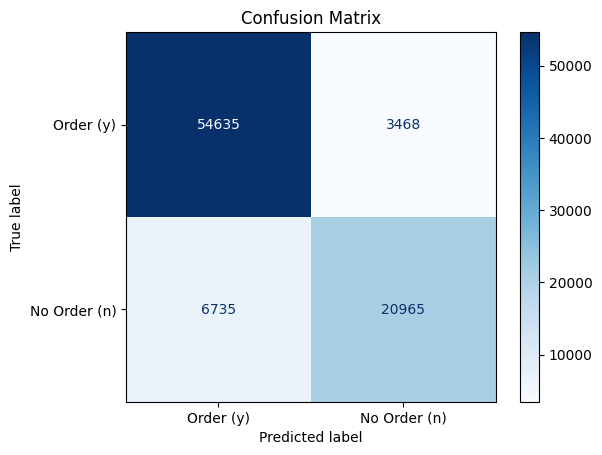

In [144]:
# Menjalankan XGBoost
clf = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="mlogloss",
    max_depth=15,
    gamma=0.8,
    subsample=0.9,
    learning_rate=0.09,
    n_estimators=50,
    seed=27,
    colsample_bytree=0.9,
    nthread=4
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluasi Model
acc_XGB = accuracy_score(y_test, y_pred)

# Mencetak hasil dari XGBoost
print("Akurasi Model XGBoost: {:.2f}".format(acc_XGB))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Order (y)', 'No Order (n)'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Berdasarkan hasil prediksi menggunakan model XGBoost, akurasi sebesar 0.88 menunjukkan bahwa model memiliki performa yang cukup baik dalam membedakan antara pesanan yang terjadi (order) dan tidak terjadi (no order). Hal ini menggambarkan bahwa dari seluruh data yang diuji, sebanyak 88% prediksi model sesuai dengan data sebenarnya. Meskipun demikian, ada 12% prediksi yang keliru, yang dapat berasal dari beberapa faktor seperti distribusi data yang tidak seimbang, atau kompleksitas model.

**Prediksi pada Seluruh Dataset**

In [145]:
# Prediksi pada keseluruhan data untuk setiap sessionNo
df['PredictedOrderStatus'] = model.predict(X)

# Mengambil prediksi per sessionNo
session_predictions = df.groupby('sessionNo')['PredictedOrderStatus'].agg(lambda x: round(np.mean(x))).reset_index()
session_predictions.columns = ['sessionNo', 'prediction']

# Tampilkan hasil prediksi
print(session_predictions)

       sessionNo  prediction
0              1           1
1              2           1
2              3           1
3              4           0
4              5           1
...          ...         ...
49995      49996           1
49996      49997           0
49997      49998           0
49998      49999           0
49999      50000           0

[50000 rows x 2 columns]


**Feature Importance**

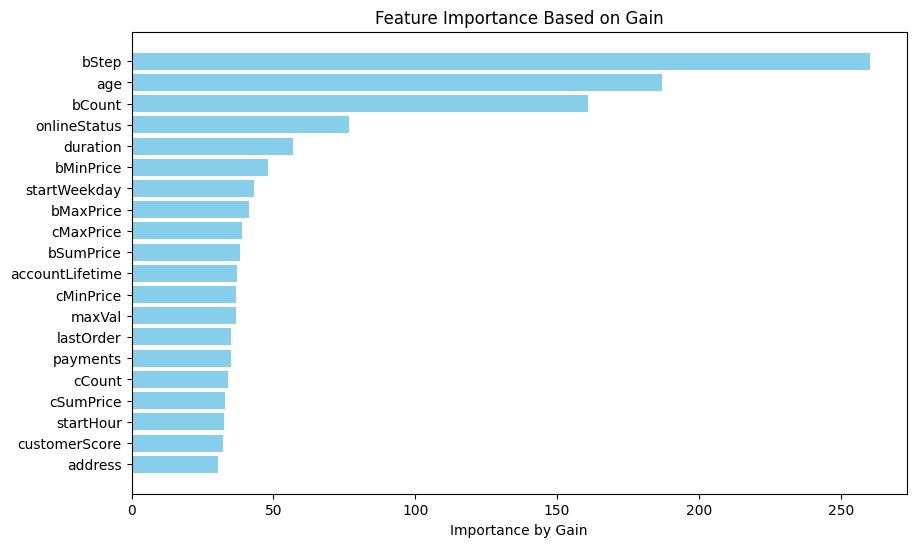

Feature Importance (sorted by Gain):
bStep: 260.2121887207031
age: 187.15557861328125
bCount: 161.01889038085938
onlineStatus: 76.72360229492188
duration: 57.04853057861328
bMinPrice: 47.970191955566406
startWeekday: 43.039825439453125
bMaxPrice: 41.26694107055664
cMaxPrice: 38.862403869628906
bSumPrice: 38.16635513305664
accountLifetime: 37.088199615478516
cMinPrice: 36.83831787109375
maxVal: 36.653682708740234
lastOrder: 35.21318817138672
payments: 34.945579528808594
cCount: 33.94014358520508
cSumPrice: 32.833805084228516
startHour: 32.43578338623047
customerScore: 32.3704948425293
address: 30.385961532592773


In [146]:
# Mendapatkan feature importance berdasarkan Gain
importance = model.get_booster().get_score(importance_type='gain')

# Menyortir berdasarkan Gain
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Menampilkan plot feature importance berdasarkan Gain
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in sorted_importance], [x[1] for x in sorted_importance], color='skyblue')
plt.xlabel('Importance by Gain')
plt.title('Feature Importance Based on Gain')
plt.gca().invert_yaxis()  # Membalikkan urutan agar fitur dengan gain tertinggi di atas
plt.show()

# Menampilkan hasil feature importance
print("Feature Importance (sorted by Gain):")
for feature, gain in sorted_importance:
    print(f"{feature}: {gain}")


Pada Chart Importance Feature diatas kita dapat melihat dan membandingkan seberapa berpengaruh fitur pada data yang kita punya terhadap model Machine Learning yang dibuat. bisa kita lihat pada chart di posisi 1 dan 2 adalah bcount dan bstep. Bcount sendiri adalah Jumlah produk yang ditambahkan ke keranjang, indikator minat beli. sedangkan bStep adalah Langkah terakhir proses pembelian yang dicapai pengguna. Dikarenakan target dari model Machine learning ini adalah prediksi order atau tidak dari suatu aktivitas pengguna, maka dua fitur ini sangatlah berpengaruh untuk jadi acuan model tersebut karena bstep dan bcount me-representasikan indikator apakah pengguna akan membeli produk tersebut atau tidak.

**Menyimpan hasil yang sudah di generate oleh model machine learning diatas kedalam file 'predicted_order_status'**

In [147]:
# Simpan hasil prediksi per session ke dalam file TXT
session_predictions.to_csv('predicted_order_status.txt', index=False, sep='|')

## Kesimpulan

Dari proses pembuatan dan evaluasi model machine learning menggunakan algoritma XGBoost, dapat disimpulkan bahwa model ini memiliki performa yang cukup baik dalam memprediksi keputusan pelanggan untuk melakukan order atau tidak berdasarkan aktivitas yang terekam dalam aplikasi belanja online. Model berhasil mencapai tingkat akurasi sebesar 0.88 (88%) pada data uji, yang menunjukkan kemampuan model dalam membedakan antara pesanan yang terjadi dan tidak terjadi dengan tingkat keandalan yang tinggi.

Hasil ini mengindikasikan bahwa fitur-fitur yang dipilih, seperti jumlah produk di keranjang, durasi sesi, harga maksimum, dan riwayat pembayaran pelanggan, berkontribusi signifikan terhadap prediksi keputusan pelanggan. Selain itu, akurasi ini menunjukkan potensi besar untuk mengimplementasikan model serupa dalam skenario bisnis nyata, seperti personalisasi penawaran dan strategi pemasaran berbasis data.

Namun, meskipun model telah menunjukkan performa yang baik, masih terdapat ruang untuk pengembangan lebih lanjut. Upaya seperti optimisasi parameter, eksplorasi fitur tambahan, atau penggunaan teknik ensemble lainnya dapat dilakukan untuk lebih meningkatkan akurasi dan generalisasi model terhadap data baru. Dengan pengembangan berkelanjutan, model ini diharapkan dapat mendekati akurasi yang lebih sempurna dalam memprediksi keputusan pelanggan, sehingga memberikan kontribusi yang signifikan dalam meningkatkan pengalaman pelanggan dan strategi bisnis perusahaan e-commerce.